In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import fnmatch
import os

In [8]:
def plot_stock(stockname, k_lst):
    """""
    plotting function to visualize accumulated profits for each hyperparameter
    plot all stocks separtely
    input: hyperparameter pair k-positive k-negative
    output: a graph
    """
    #read all data files related to the pair into a pd dataframe
    filenames = []
    for file in os.listdir('./csv_output'):
        for kpos, kneg in k_lst:
            pattern = '{}_{}_{}.csv'.format(stockname, kpos, kneg)
            if fnmatch.fnmatch(file, pattern):
                filenames.append('./csv_output/'+file)
    dt_lst = []
    for filename in filenames:
        kpos, kneg = int(filename.split('/')[2].split('.')[0].split('_')[1]), int(filename.split('/')[2].split('.')[0].split('_')[2])
        df = pd.read_csv(filename, index_col=None, header=0)
        df['kpos'] = kpos
        df['kneg'] = kneg
        dt_lst.append(df)
    data = pd.concat(dt_lst, axis=0, ignore_index=True)
    #preparing data for visualization
    data['Profit'] = data['Profit'].replace(np.nan, 0)
    #add accumulative profit
    data['CumProfit'] = data.groupby(['kpos','kneg'])['Profit'].cumsum()
    #add data according to time column
    time_filename = './data/AAPL_2019.csv'
    time_lst = pd.read_csv(time_filename, index_col=None, header=0)['Date'].tolist()
    data['Date'] = 0
    for i in range(len(data)):
        data.loc[i, 'Date'] = time_lst[data.loc[i, 'Time']]
    data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
    data['k'] = (data["kpos"]/10).astype(str) + ', ' + (data["kneg"]/10).astype(str)
    
    return data

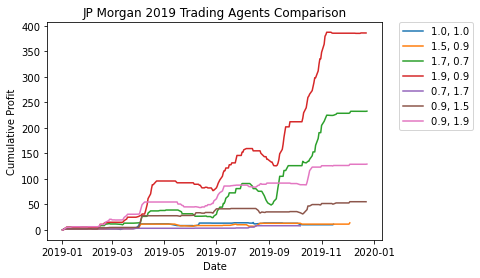

In [16]:
k = [(10,10), (15,9),(17,7),(19,9),(7,17),(9,15),(9,19)]
plt_data = plot_stock('JPM', k)
plot = sns.lineplot(data=plt_data, x='Date', y='CumProfit', hue='k')
plot.set(xlabel='Date', ylabel='Cumulative Profit', title='JP Morgan 2019 Trading Agents Comparison')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('JPM.png', bbox_inches='tight')

[Text(0.5, 1.0, 'JPM')]

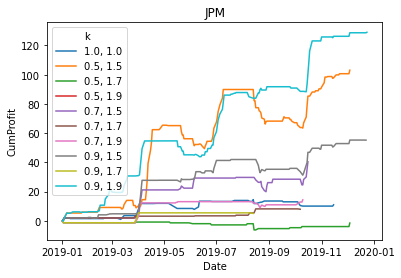

In [17]:
k = [(10,10), (5,15), (5,17),(5,19),(7,15), (7,17), (7,19), (9,15), (9,17), (9,19)]
plot_stock('JPM', k)

In [67]:
def plot_parameters(k):
    """""
    plotting function to visualize combined profits for each hyperparameter
    plot all stocks separtely
    input: hyperparameter pair k-positive k-negative
    output: a graph
    """
    kpos, kneg = k
    #read all data files related to the pair into a pd dataframe
    filenames = []
    for file in os.listdir('./csv_output'):
        pattern = '*_{}_{}.csv'.format(kpos, kneg)
        if fnmatch.fnmatch(file, pattern):
            filenames.append('./csv_output/'+file)
    dt_lst = []
    for filename in filenames:
        df = pd.read_csv(filename, index_col=None, header=0)
        dt_lst.append(df)
    data = pd.concat(dt_lst, axis=0, ignore_index=True)
    data = data.dropna()
    plot = sns.histplot(data=data, x='Profit',binwidth=5)
    plot.set(xlabel='Profit From Each Investment', title='k-positive={}, k-negative={} Profit Histogram'.format(kpos/10, kneg/10))
    plot.set_xlim(-80,80)
    return plot

<AxesSubplot:title={'center':'k-positive=0.9, k-negative=1.9 Profit Histogram'}, xlabel='Profit From Each Investment', ylabel='Count'>

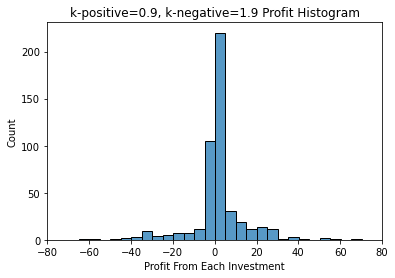

In [88]:
k = (9,19)
plot_parameters(k)

In [ ]:
# k = [(1,1), (1.5,0.5), (1.5,0.7), (1.5,0.9), (1.7,0.5), (1.7,0.7),
    #       (1.7,0.9), (1.9,0.5), (1.9,0.7), (1.9,0.9), (0.5,1.5), (0.5,1.7),
    #       (0.5,1.9),(0.7,1.5), (0.7,1.7), (0.7,1.9), (0.9,1.5), (0.9,1.7),
    #       (0.9,1.9)]

In [5]:
k_lst = [(10,10),(19,5),(5,19)]
stocks = ['AAPL','GOOG','PFE','JNJ','BA','JPM','DAL','GS']
d_lst = [plot_stock(stock, k_lst) for stock in stocks]

In [6]:
len(d_lst)

8

In [7]:
data = pd.concat(d_lst, axis=0, ignore_index=True)

In [14]:
#data.to_csv('plot-data.csv',index=False)

In [8]:
data

,StockName,Time,Action,Profit,kpos,kneg,CumProfit,Date,k
0,AAPL,0,BUY,0.000000,10,10,0.000000,2019-01-02,"1.0, 1.0"
1,AAPL,3,BUY,0.000000,10,10,0.000000,2019-01-07,"1.0, 1.0"
2,AAPL,4,BUY,0.000000,10,10,0.000000,2019-01-08,"1.0, 1.0"
3,AAPL,5,SELL,-1.118816,10,10,-1.118816,2019-01-09,"1.0, 1.0"
4,AAPL,6,SELL,1.424625,10,10,0.305809,2019-01-10,"1.0, 1.0"
5,AAPL,7,SELL,0.373753,10,10,0.679562,2019-01-11,"1.0, 1.0"
6,AAPL,33,BUY,0.000000,10,10,0.679562,2019-02-20,"1.0, 1.0"
7,AAPL,35,SELL,0.229115,10,10,0.908676,2019-02-22,"1.0, 1.0"
8,AAPL,57,BUY,0.000000,10,10,0.908676,2019-03-26,"1.0, 1.0"
9,AAPL,58,SELL,0.409477,10,10,1.318153,2019-03-27,"1.0, 1.0"
